# Exploratory data analysis (EDA)

## Haberman’s Cancer Survival DataSet

In [2]:
#Inport Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Loading Haberman.csv into a pandas dataFrame.
Haberman = pd.read_csv("haberman.csv")

In [3]:
# 1.1 No. of data-points 
# 1.2 No of features.
print (Haberman.shape)

(306, 4)


In [4]:
#Features name in data sets
print (Haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
#1.3 No. of data points in each class
Haberman["status"].value_counts()
# Unbalanced or we can say partially balanced dataset.

1    225
2     81
Name: status, dtype: int64

### 1.1 Bi-variate analysis

#### Scatter plots

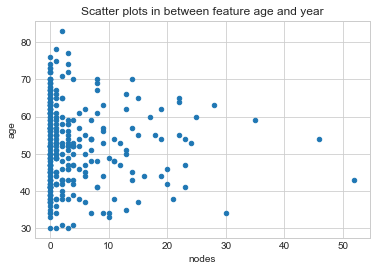

In [28]:
Haberman.plot(kind='scatter', x='nodes', y='age') ;
plt.title('Scatter plots in between feature age and year')
plt.show()


Scatter plot is showing so much overlap. Here we are not able to distinguish the class1 and class2 points. For dishtinguish, we have to show the points in different color(we have to use seaborn library).

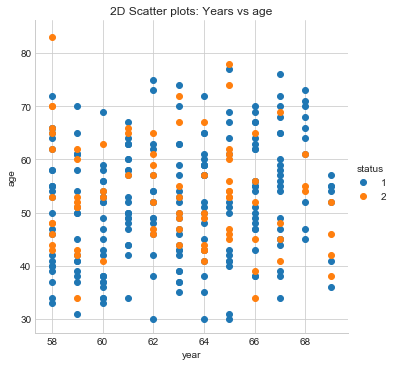

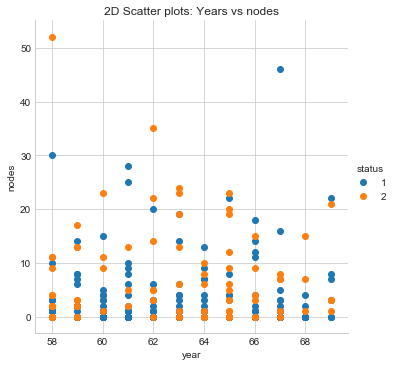

In [26]:
# Let's visualize some 2D Scatter plots with color coding for each class
for feature in list(Haberman.columns):
    if feature != "status" and feature != "year" :
        sns.set_style("whitegrid");
        sns.FacetGrid(Haberman, hue="status", size=5) \
           .map(plt.scatter, "year", feature) \
           .add_legend();
        plt.title('2D Scatter plots: Years vs '+feature)
        plt.show();


Function<FacetGrid>: We are able to dishtinguish points with color.

#### Pair-plots
1. Out goal is to choose important features in such a way that our error rate will be less.
2. If we have less features than we can easily visualize out features using pair plot.


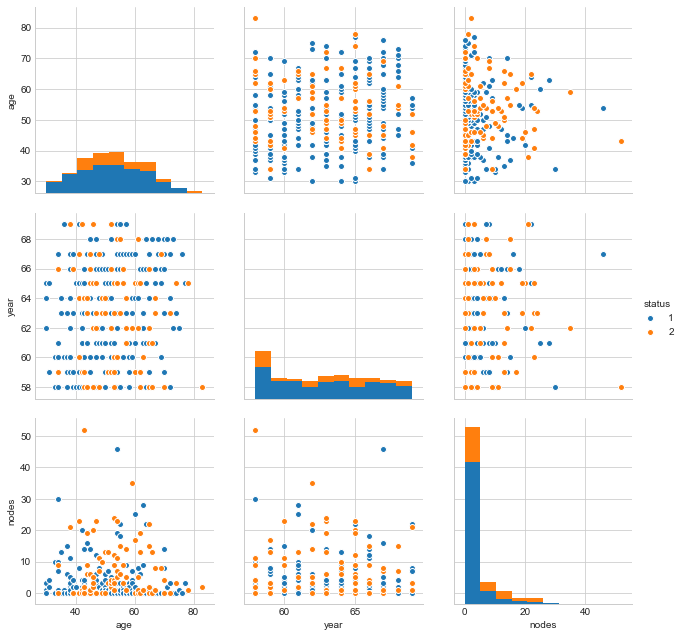

In [17]:
#plt.close();
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue="status",vars=['age','year','nodes'], size=3);
plt.show()

Plot3 are the best among all other plots because some point are distinguishable so we will choose 2 features age and nodes.

### 1.2 PDF, CDF, Boxplot, pair plots

#### PDF(Probability Density Function)

C:\Users\venka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\venka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


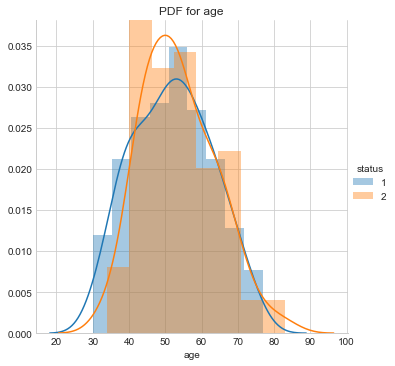

C:\Users\venka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\venka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


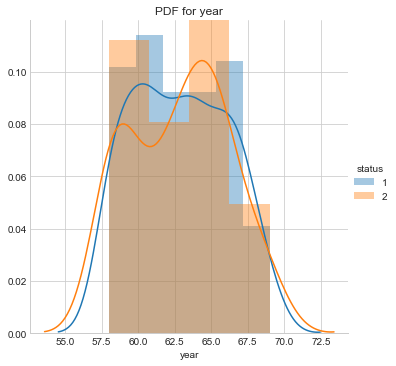

C:\Users\venka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\venka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


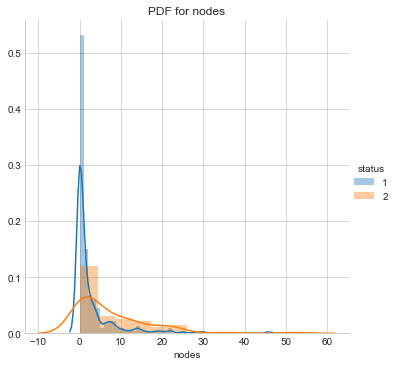

In [18]:
for feature in list(Haberman.columns):
    if feature != "status":
        sns.FacetGrid(Haberman, hue="status", size=5) \
           .map(sns.distplo 

 PDF for node: Here we can see that people will survive more if the no of nodes are less eventhough it is hard to classify.

#### CDF(cumulative distribution function)

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


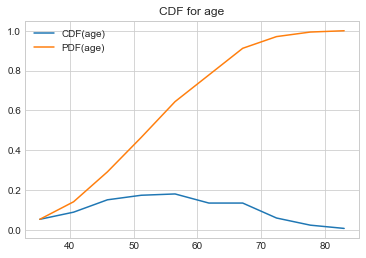

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


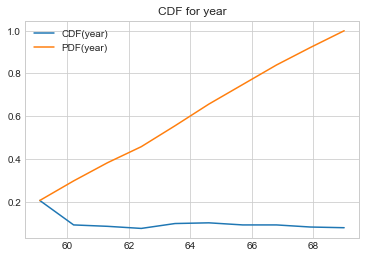

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


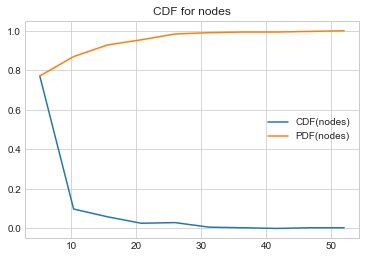

In [22]:
Haberman_Status1 = Haberman.loc[Haberman['status'] == 1]
#Plot CDF of petal_length
for feature in list(Haberman.columns):
    if feature != "status":
        counts, bin_edges = np.histogram(Haberman[feature], bins=10, 
                                         density = True)
        pdf = counts/(sum(counts))
        print(pdf);
        print(bin_edges)

        #compute CDF
        cdf = np.cumsum(pdf)
        plt.plot(bin_edges[1:],pdf)

        plt.plot(bin_edges[1:], cdf)
        plt.legend(['CDF'+ '(' +feature + ')','PDF'+'('+feature+ ')'])

        plt.title('CDF for ' + feature)
        plt.show();

### 1.3 Box plot and Whiskers

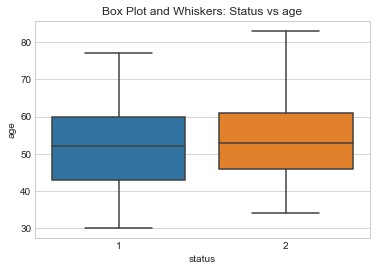

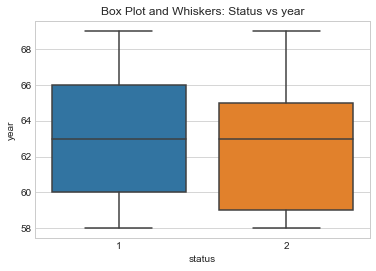

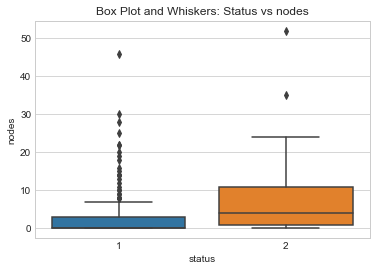

In [19]:
for feature in list(Haberman.columns):
    if feature != "status":        
        sns.boxplot(x='status',y=feature, data=Haberman)
        plt.title('Box Plot and Whiskers: Status vs '+feature)
        plt.show()

### 1.4 Violin plots

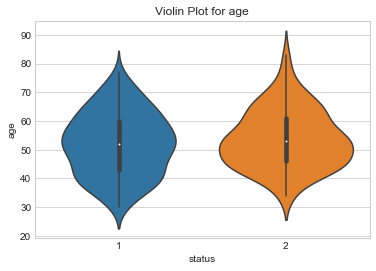

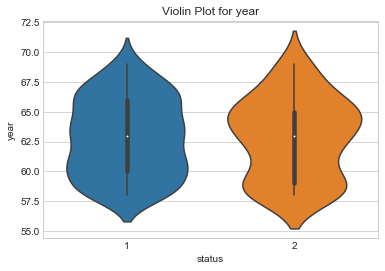

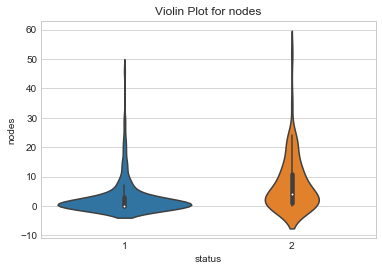

In [24]:
for feature in list(Haberman.columns):
    if feature != "status":
        sns.violinplot(x="status", y=feature, data=Haberman, size=8)
        plt.title('Violin Plot for '+feature)
        plt.show()

### 1.5 Multivariate Contour Probability density

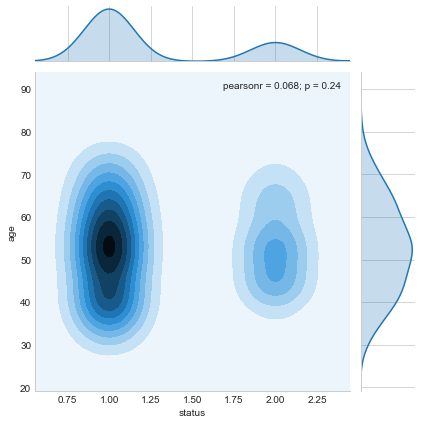

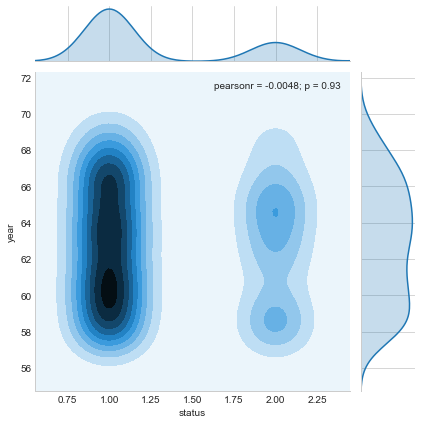

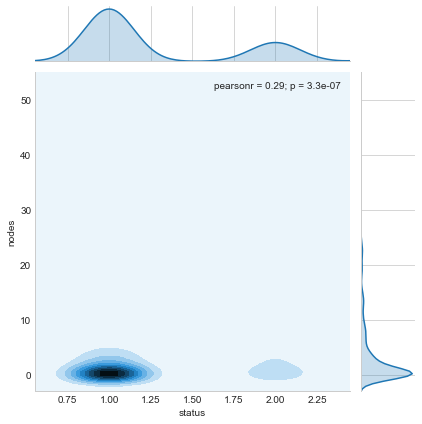

In [25]:
for feature in list(Haberman.columns):
    if feature != "status":
        sns.jointplot(x="status", y=feature, data=Haberman,kind = "kde")
        plt.show()

#### Observation
1. As we can see that there are 2 classes in this dataset.
Class1: Patients who servived 5 years or more after the treatment.
Class2: Patients who died within 5 years of treatment.
2. Class1 contains 225 instances and class 2 contains 81 instances means this data set is imbalance dataset



####  Observation in Univariate Analysis
* In CDF graphs, we can observe that 80% patients is effected by less than equal 5 Positive lymph nodes.
* Patients who is having 0 to 5 positive lymph nodes.There is highly chances that those patients will survive.





#### Observation in Bi-variate Analysis
* we are scattering the data points in bw treatment year and Positive nodes. We can observe that there is better seperation bw the two classes than other plots.

### Final observation
* Since the data of both the statuses overlap each other for the given features, we need more parameters to distinguish both the phenomenon.